In [1]:
%matplotlib inline
from __future__ import print_function
import seaborn
import matplotlib.pyplot as plt
import numpy
import collections
seaborn.set_context({"figure.figsize": (12, 8)})

/Users/standage/Projects/py3dev/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def plot_hist_rug(data, bins=None, xlim=None, ylim=None, title=None,
                  xlab='iiLocus Length (bp)', ylab='Frequency', xlog=True):
    """Boilerplate code for visualizations."""
    if bins is None and xlim is not None:
        bins = numpy.arange(xlim[0], xlim[1], 0.2)
    if xlog:
        plot = seaborn.distplot(numpy.log10([x + 1 for x in data]), bins=bins, kde=False, rug=True)
    else:
        plot = seaborn.distplot(data, bins=bins, kde=False, rug=True)
    seaborn.plt.xlabel(xlab, fontsize=16)
    seaborn.plt.ylabel(ylab, fontsize=16)
    if title:
        seaborn.plt.title(title, fontsize=18)
    if xlim is not None:
        _ = plot.set(xlim=(xlim[0], xlim[1]))
    if ylim is not None:
        _ = plot.set(ylim=(ylim[0], ylim[1]))

In [3]:
def parse_adj_iilocus_lengths(infile, seqid_index=0, length_index=1, n=2):
    iiloci = collections.deque()
    for line in infile:
        fields = line.rstrip().split('\t')
        seqid = fields[seqid_index]
        length = int(fields[length_index])
        if len(iiloci) > 0 and iiloci[0][0] != seqid:
            iiloci = collections.deque()
        iiloci.append((seqid, length))
        if len(iiloci) == n:
            aggregate_length = sum([ilocus[1] for ilocus in iiloci])
            yield aggregate_length
            iiloci.popleft()

In [4]:
def iilocus_hist_orig_vs_shuf(species, xmax, ymax, n=2):
    plt.subplot(121)
    filename = 'species/%s/shuffled/%s.orig.ilens.tsv' % (species, species)
    with open(filename, 'r') as infile:
        lengths = [x for x in parse_adj_iilocus_lengths(infile, n=n)]
        avg = numpy.mean(lengths)
        med = numpy.median(lengths)
        plt.title('As annotated (avg=%.2f, med=%d)' % (avg, med))
        plot_hist_rug(lengths, xlab='Length (bp)',
                      xlim=(0, xmax), ylim=(0, ymax))

    plt.subplot(122)
    filename = 'species/%s/shuffled/%s.shuffled.ilens.tsv' % (species, species)
    with open(filename, 'r') as infile:
        lengths = [x for x in parse_adj_iilocus_lengths(infile, n=n)]
        avg = numpy.mean(lengths)
        med = numpy.median(lengths)
        plt.title('Shuffled (avg=%.2f, med=%d)' % (avg, med))
        plot_hist_rug(lengths, xlab='Length (bp)', ylab='',
                      xlim=(0, xmax), ylim=(0, ymax))

    plt.suptitle('%s: Length of %d consecutive iiLoci (n=%d)' % (species, n, len(lengths)), fontsize=16)
    plt.show()

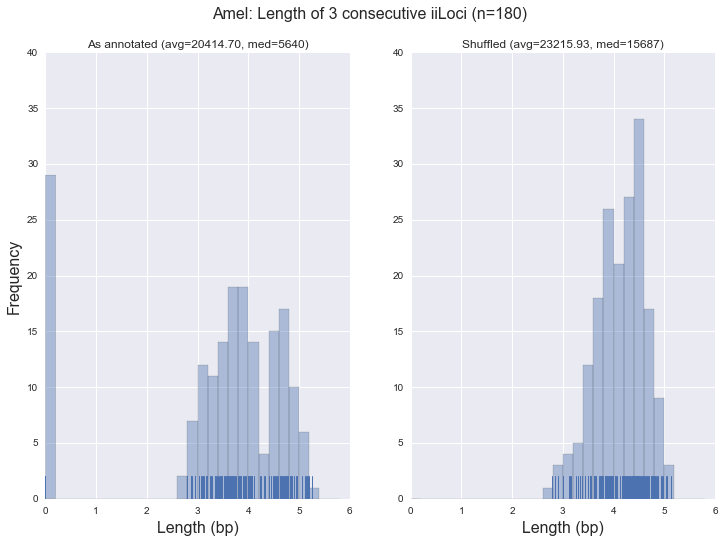

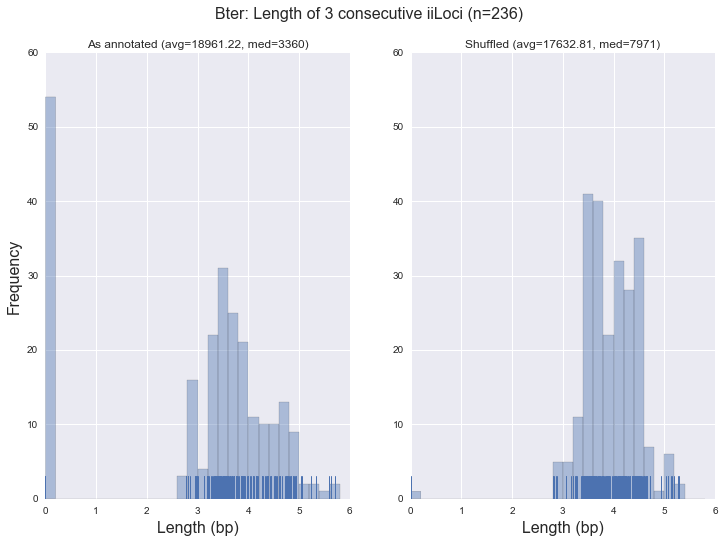

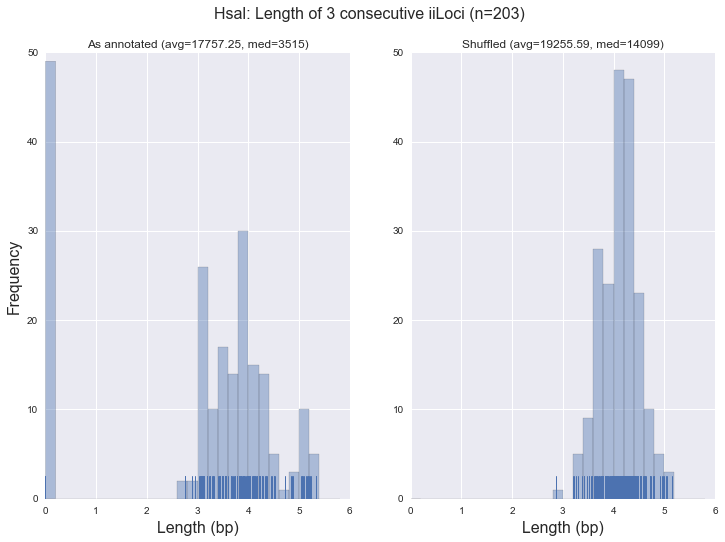

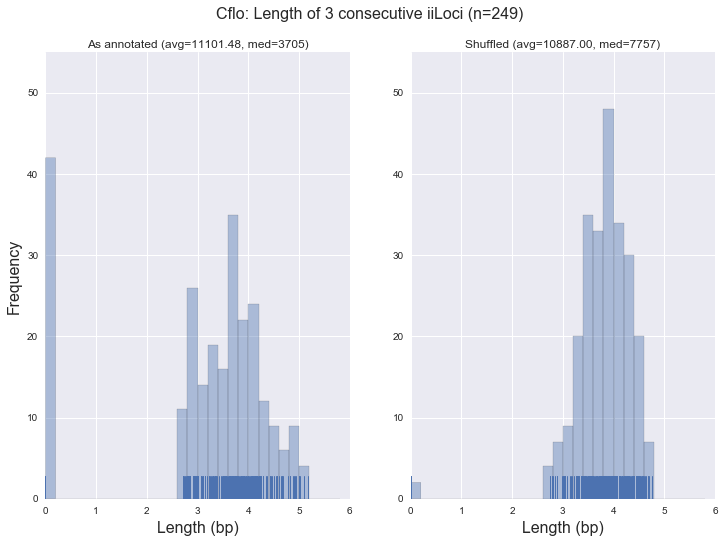

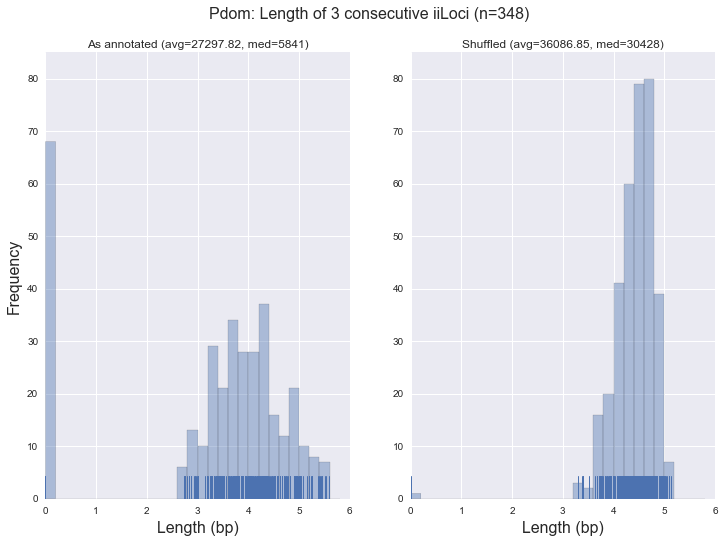

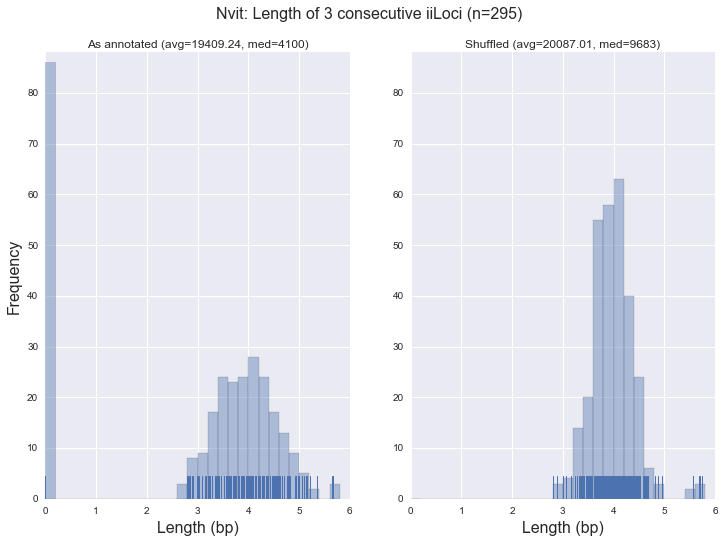

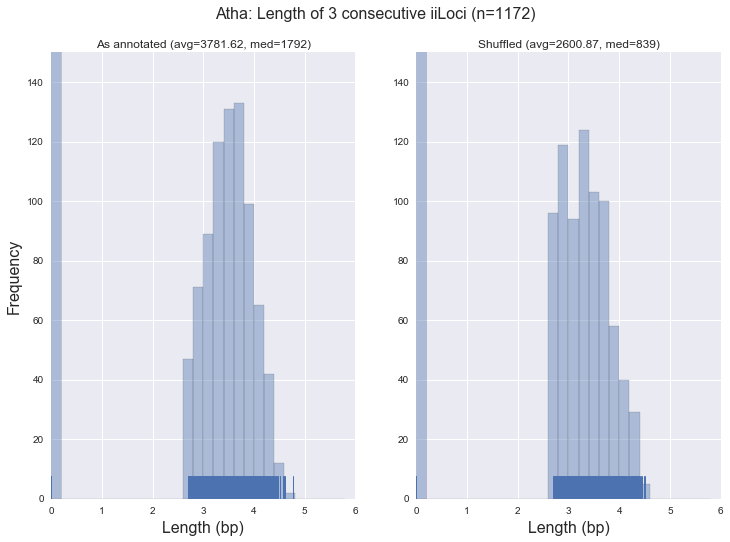

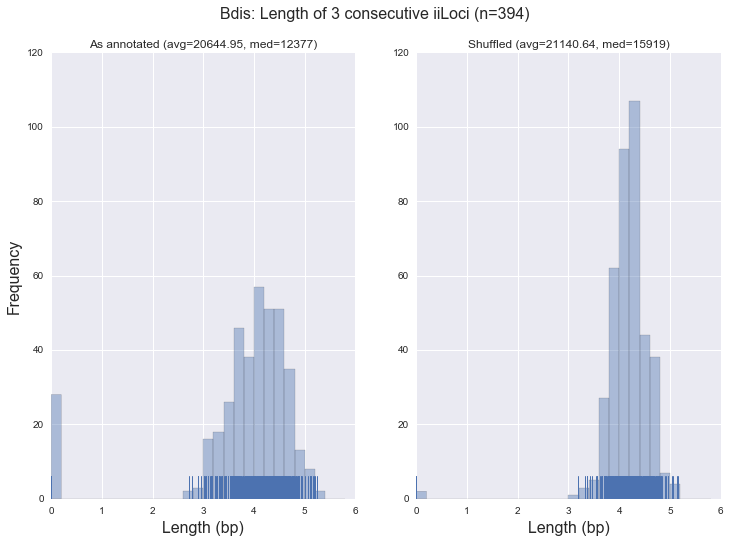

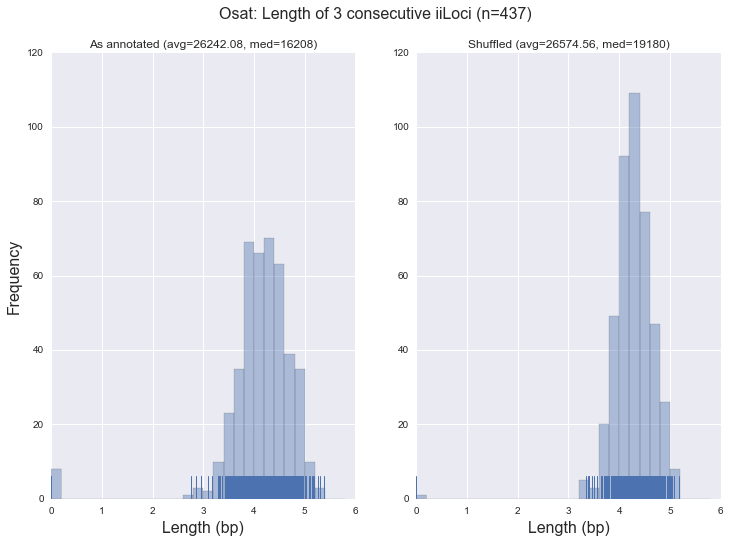

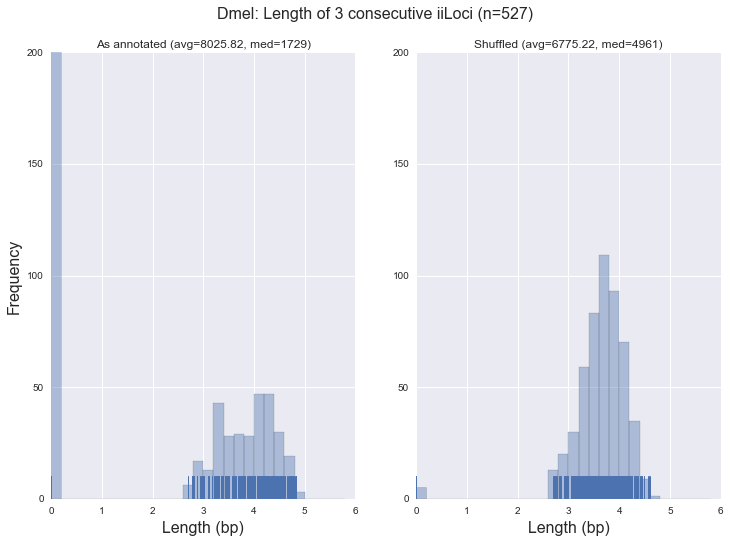

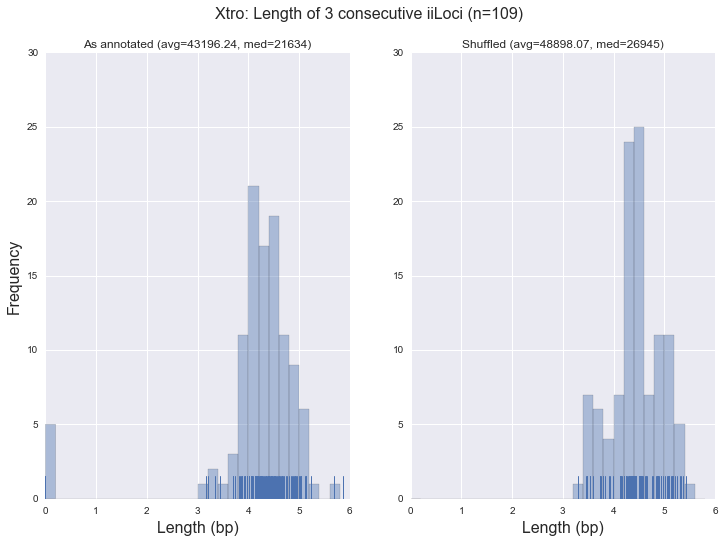

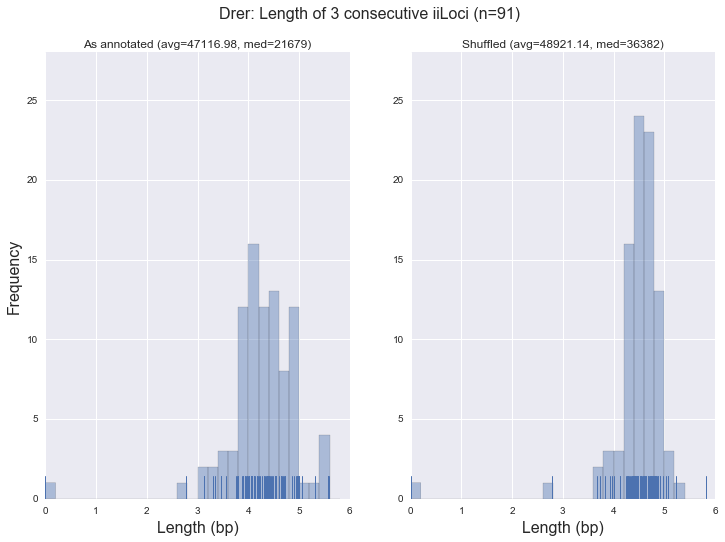

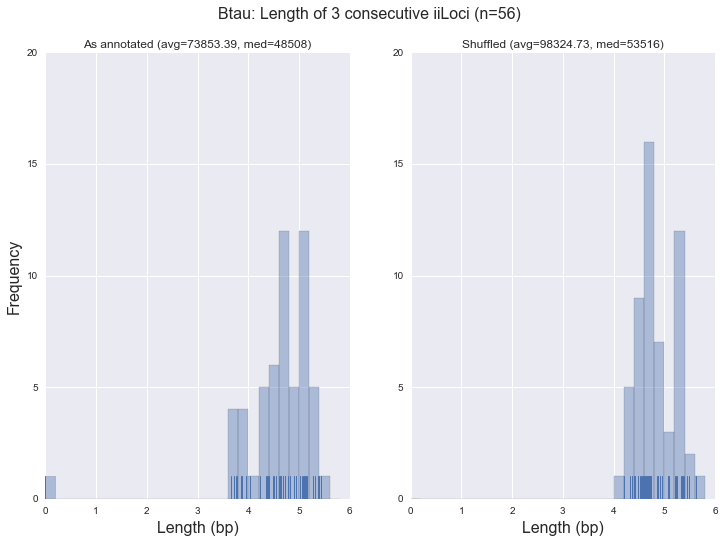

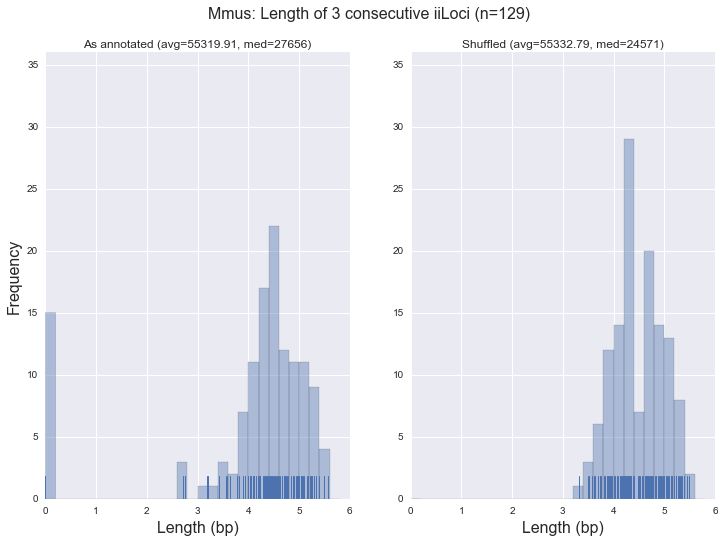

In [5]:
specdata = [('Amel', 6.0, 40), ('Bter', 6.0, 60),
            ('Hsal', 6.0, 50), ('Cflo', 6.0, 55),
            ('Pdom', 6.0, 85), ('Nvit', 6.0, 88),
            ('Atha', 6.0, 150), ('Bdis', 6.0, 120),
            ('Osat', 6.0, 120), ('Dmel', 6.0, 200),
            ('Xtro', 6.0, 30), ('Drer', 6.0, 28),
            ('Btau', 6.0, 20), ('Mmus', 6.0, 36)]
for species, xmax, ymax in specdata:
    iilocus_hist_orig_vs_shuf(species, xmax, ymax, n=3)